In [1]:
import citai_mood22
import matplotlib.pyplot as plt

### Define preprocessing / synthetic generation specs

In [7]:
datasets = [{"image":r"C:\Users\snava\Documents\23_03_SynthPreT\data_dummy\00042.nii.gz"}]
patch_size = [160,160,160]

transforms_kwargs = {
        "spacing": [1, 1, 1],
        "spatial_augmentations": True,
        "intesity_augmentations": True,
        "preserve_zero_background" : True,}

fpi_kwargs = {
        "fp_size": [128, 128, 128],
        "p_anomaly": 0.9,
        "alpha_range": [0.8, 1.0],
        "smooth_mask": True,
        "fp_augmentations": True,
        "mask_generators_prob_dict": {
            "RandomSquare": 1,
            "RandomMask": 1,
            "RandomSphere": 1
        },
        "anomaly_interpolation":'linear', # 'linear' or 'poisson' for PII. 'none' to obtain the sampled image without anomalies
        "mask_generators_kwarg_dict": {
            "RandomSquare": {"rotation_prob": 0.5, "min_anom_sizes": [10, 10, 10],
                             "no_mask_in_background": False},
            "RandomMask": {"dataset": "./citai_mood22/masks_synthetic/dataset.json",
                           "no_mask_in_background": False},
            "RandomSphere": {"min_anom_size": 10, "no_mask_in_background": False}
        }, 
}

dataset_kwargs = {"cache_rate": 1, "num_workers": 12}

In [8]:
ds = citai_mood22.preprocessing.get_dataset(datasets=datasets, 
                                            transforms_kwargs=transforms_kwargs,
                                            patch_size=patch_size,
                                            fpi_kwargs=fpi_kwargs,
                                            dataset_kwargs=dataset_kwargs)

Loading dataset: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:35<00:00, 35.33s/it]


In [4]:
sample = ds[0]

In [5]:
sample.keys()

dict_keys(['image', 'ForegroundMask', 'fp', 'mask', 'anom_center'])

### Plot multiple samples of corrupted image, foreign patch and mask components

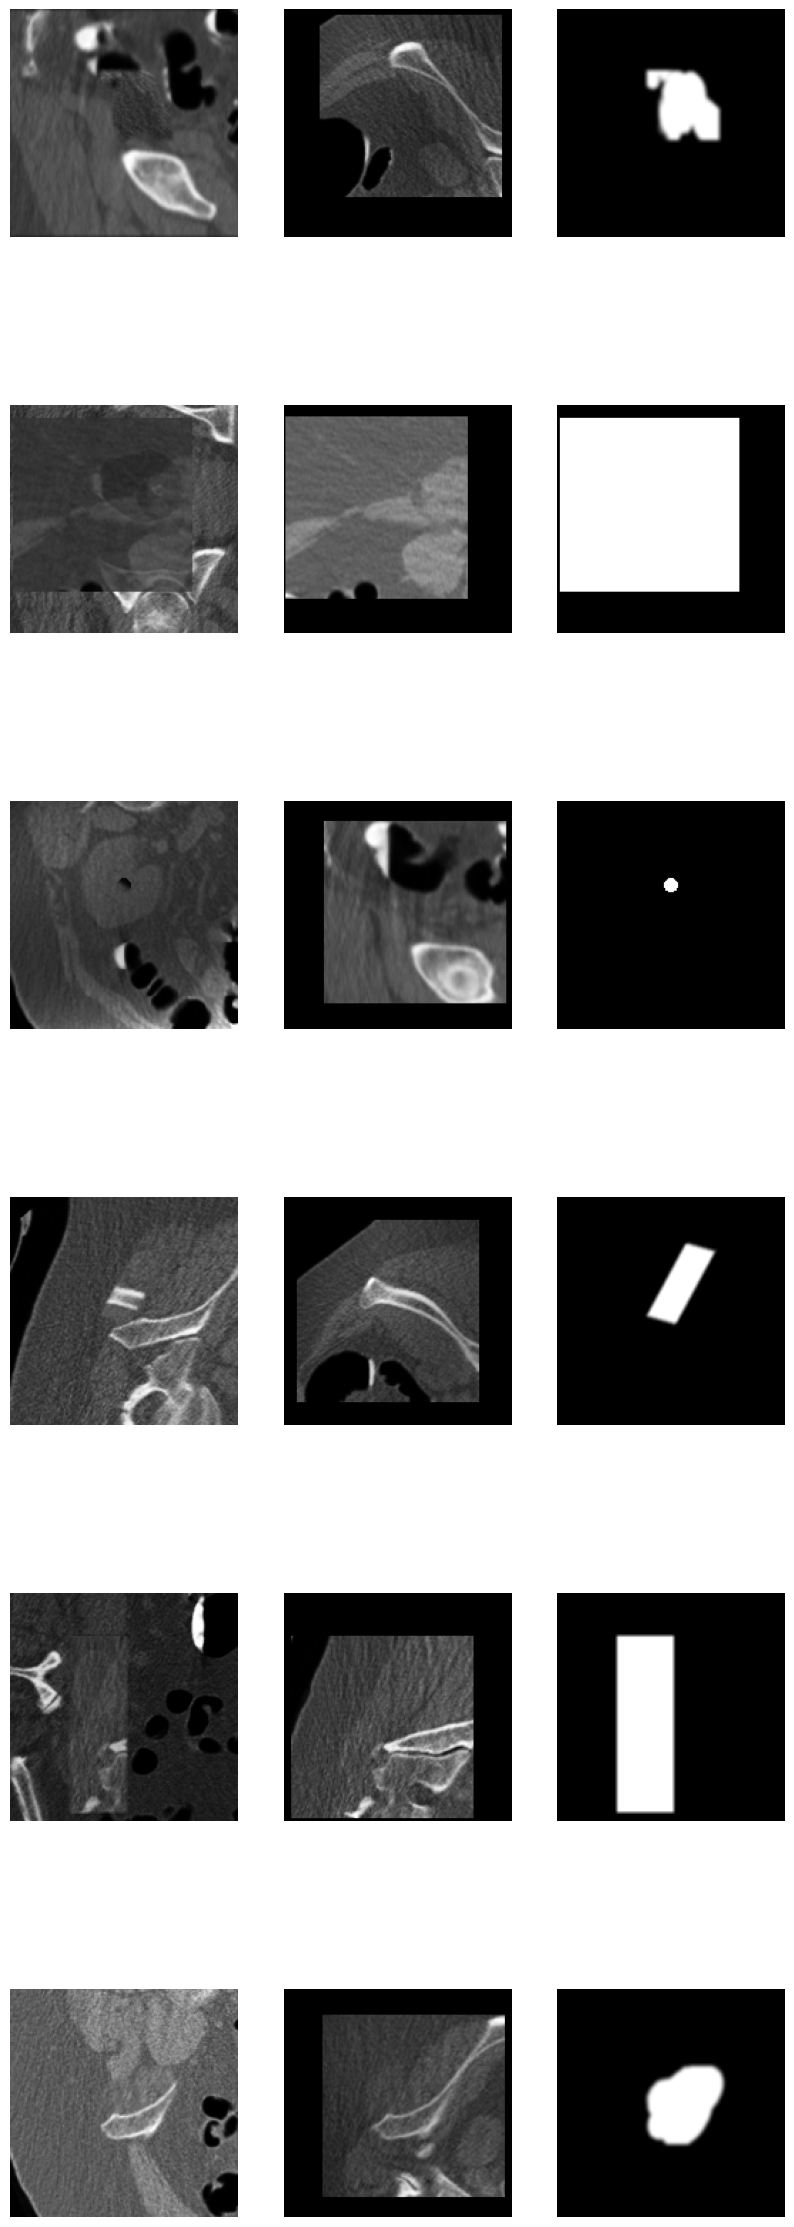

In [10]:


fig, ax = plt.subplots(6,3,figsize=(10,30))


for a in ax:
    sample = ds[0]
    # Get the axial slice with most anomalous pixels
    slice_plot = sample['mask'].movedim(-1,0).flatten(1).sum(1).argmax()


    a[0].imshow(sample['image'][0,:,:,slice_plot],'gray')
    a[1].imshow(sample['fp'][0,:,:,slice_plot],'gray')
    a[2].imshow(sample['mask'][0,:,:,slice_plot],'gray')

    [_.axis('off') for _ in a]
plt.show()